# Multi-layer Neural Networks

We have seen that the single Perceptron is able to linearly separate a dataset, spitting out "0" or "1" as a function of the data being below or above the separating hyperplane defined by the weight vector $w$. It is easy to see that some problems cannot be linearly separated. 

<center>
<img src="figs/xorproblem.svg">
</center>

In the example above, the red and the blue data points are not separable by a single line, but require at least two. This problem is known as the "XOR" problem, which can be seen by looking at just four data points at $(0,0)$, $(0,1)$, $(1,0)$, and $(1,1)$. Creating a truth table (right) reveals a truth table with the characteristics of logical exclusive or (XOR), that is $x_1$ and $x_2$ have to be different for the output to be true (here "blue"), whereas the output is false (here "red") when the inputs are the same.

We already know that a single Perceptron can create a single separating hyperplane, we will therefore need at least two Perceptrons to solve the XOR problem. Using two Perceptrons in parallel will yield us with tuples of the kind $(0,0)$, $(0,1)$ and so on. We therefore need one more Perceptron to recombine these tuples into a single output. The figure below shows the simple-most multi-layer Perceptron that can be trained for the XOR problem, with one input layer, a so-called hidden layer, and an output layer.

<center>
<img src="figs/basicnetworks.svg" width="50%">
</center>    
    

Note that each Perceptron comes with its own weight vector $w$. Given the input being of dimension $m$, the multi-layer perceptron with two Perceptrons in the hidden layer therefore has $2m+2+3$ parameters, which account for the $m$-dimensional input to the two Perceptrons in the hidden layer, the 2 parameters of the output layer Perceptron, and the three bias values. 

The output is computed by first computing the output from the two Perceptrons in the hidden layer and stacking their outputs into a vector, which serves as input vector to the Output perceptron. This is called <i>forward propagation</i>.

## Formal description of a multi-layer ANN

As with the simple Perceptron, we will use node i's bias as the 0-th weight vector, that is 

$$w^k_{0,j}=b^k_j$$

Here, we use the following notation. We will denote the <i>layer</i> with a superscript, and the index of the incoming node and the outgoing node with a subscript tuple. That is $w^k_{i,j}$ is connecting the i-th incoming weight to the $j-th$ node of the $k-th$ layer. (The i-th incoming weight is the j-th node in layer $k-1$.) This, as well as the simple example network from above, are illustrated below: 

<center>
    <img src="figs/backpropnotation.svg" width="50%">
</center>

Each layer, denoted by the index $k$, has exactly $r^k$ nodes.

### Inputs and outputs

The output $o_i$ of output node $i$ is given by

$$o_i=g(a_i^k)$$

where $g()$ is a non-linear activation function. Here, $a_i^k$ is the weighted sum computed by node $i$ in layer $k$, also known as the <i>activation</i>:

$$a_i^k=\sum_{j=0}^{r_{k-1}}w_{j,i}^ko_j^{k-1}$$

with $o_j^{k-1}$ is the j-th output of the previous layer. This is illustrated in the image below:

<center>
    <img src="figs/backpropnotation2.svg" width="50%">
</center>



In case of $k$ being the output layer, $o_i^k$ should be equivalent to $y_i^k$. Likewise, in case of $k-1$ being the input layer $o_i^{k-1}=x_i$.

## Activation functions

Using a on-off Heaviside step function makes training a neural network using backpropagation rather difficult as a function that switches from "not working at all" to "working completely" provides very little information in which direction to move. It is therefore more desirable to have a smooth activation function. One such function is the <a href="https://en.wikipedia.org/wiki/Sigmoid_function">sigmoid function</a>:

$$\sigma(x)=\frac{1}{1+e^{-x}}$$

Its main characteristics are that it stays between 0 and 1, and crosses the y-axis at 0.5

<center>
<img src="figs/sigmoid.svg" width="50%">
</center>

The sigmoid function is very attractive for learning using backpropagation as the direction in which the weights should move to improve the error is very clear in the vicinity of $wx=0$, and computing its derivative is rather simple as we see below. In case of $wx$ being very large, or very small, the neuron either saturates or never activates, also known as the <i>vanishing gradient</i> problem. Another drawback is that computing the sigmoid function is computationally expensive. A similar function is the hyperbolic tangent $\tanh()$ which remains in the range of -1 to 1 and crosses the y-axis at 0.

A popular solution to decrease computation time is the Rectified Linear Unit (ReLU), which is given by

$$R(x)=max(0,x)$$

and is shown in the figure below
<center>
<img src="figs/ReLU.svg" width="50%">
</center>
the dashed line indicates a refinement of the ReLU known as "leaky ReLU" with a slope of typical 0.1, and improves learning for negative $wx$ by providing a directional gradient. 

Note that we only talk about "Perceptrons" when the Heaviside step function is used as activation function. 

## Training a multi-layer neural network

Finding a set of weights and bias values, that is 9 parameters for a simple two-dimensional problem, manually is an NP-complete problem (Blum, 1992). We consider a training dataset consisting of input-output pairs $x_i$ and ouput $y_i$ with $i=1..N$, and a feedforward neural network with parameters $w$.

### Error function

The goal of training is to minimize an error function such as the mean squared error 
$$E(x,y,w)=\frac{1}{2N}\sum_{i=1}^{N}(\hat{y_i}-y_i)^2$$
between the output $\hat{y_i}$ that the neural network with parameters $w$ computes and the known value $y_i$ from what is known as the <i>training set</i>. 

Similar to the Perceptron, we can reduce $E(x,y,w)$ by iteratively descending along its gradient, that is

$$ w(t+1)=w(t)-\alpha \frac{\partial E(x,y,w(t))}{\partial w}$$

### Backpropagation
Calculating the partial derivatives for the error function is not straightforward, however, as the neural network implements a computation graph, transforming the input $x$ by a series of multiplications and non-linear activation functions, which in turn require the <a href="https://en.wikipedia.org/wiki/Chain_rule">chain</a> and <a href="https://en.wikipedia.org/wiki/Product_rule">product</a> rule. 

Applying the chain and product rules can be done in two ways: moving forwards or backwards through the computation graph. Actually doing this by hand for a simple graph shows that going backwards is significantly more efficient, which is extensively described <a href="http://colah.github.io/posts/2015-08-Backprop/">here</a>. Manually deriving the individual partial derivatives also illustrates that many of the computations can actually be recycled. This solution is known as <i>backpropagation</i> (Rumelhart, 1985), a technique that has been independently discovered in multiple fields. The derivation below follows the blog post on <a href="https://brilliant.org/wiki/backpropagation/">brilliant.org</a>.


In a first step, we note that the error function is a sum over all input-output pairs:

$$ \frac{\partial E(x,y,w)}{\partial w_{i,j}^k}=\frac{1}{2N}\sum^N_{d=1}\frac{\partial}{\partial w_{i,j}^k}(\hat{y_d}-y_d)^2=\frac{1}{2N}\sum_{d=1}^N\frac{\partial E_d}{\partial w_{i,j}^k}$$

We will therefore focus on only one input-output pair $(x_d,y_d)$ and differentiate against $w_{i,j}^k$. (The index $d$ has been chosen to avoid confusion with the indices $i$ and $j$, and will be omitted for brevity in the remainder).

#### The chain rule

The key for understanding the backpropagation algorithm is to apply the chain rule in a correct way. Specifically, if a variable $z$ depends on the variable $y$, which itself depends on the variable $x$, then
$$\frac{dz}{dx}=\frac{dz}{dy}\frac{dy}{dx}$$

With the output layer having index $m$ and a single output ($a^m_1$), the error is computed by the recursive formula
$$E(x,y,w_{i,j})=\frac{1}{2}(\hat{y}-y)^2=\frac{1}{2}(g(a_1^m)-y)^2=
\frac{1}{2}\left(g\left(\sum_{l=0}^{r_{m-1}}w_{l,1}^mo_l^{m-1}\right)-y\right)^2.$$
We observe that the variable $E$ depends on the outputs $o_l^{m-1}$ with $l=0..r_{m-1}$ from the previous layer. Recall that $o_l^{m-1}$ is simply the activation $a_l^{m-1}$ after applying the activation function. Also recall that $w^m_{i,1}$ are weights coming into node $1$. The error with respect to $w_{i,j}$ is therefore dependent on all $a^k_j$ for all previous layers. This is also visualized below:

<center>
    <img src="figs/backpropnotation3.svg" width="100%">
</center>

The chain rule therefore states

$$ \frac{\partial E}{\partial w_{i,j}^k}=\frac{\partial E}{\partial a_i^k}\frac{\partial a_i^k}{\partial w_{i,j}^k}.$$


#### Error at layer k
The first term is part of a vector called the "error at layer $k$"  that consists of errors at all nodes $j$ in layer $k$ and is denoted by 

$$\delta^k_j=\frac{\partial E}{\partial a_j^k}$$

The second term can be computed from the definition of $a_j^k$ above

$$\frac{\partial a^k_j}{\partial w_{i,j}^k}=\frac{\partial}{\partial w_{i,j}^k}\left(\sum_{l=0}^{r_{k-1}} w_{l,j}^k o^{k-1}_l\right)=o^{k-1}_i$$

which follows from the fact that only the term involving $o^{k-1}_i$ is the one where $l=i$. In case you expect the chain rule to apply further, remember that $o^{k-1}_i$ is actually not dependent on $w_{i,j}^k$, so you are done here.

Thus, the partial derivative of the error function $E$ with respect to weight $w_{i,j}^k$ is

$$ \frac{\partial E}{\partial w^k_{i,j}}=\delta^k_jo^{k-1}_i.$$

We can see that the error $E$ with respect to each individual weight $w_{i,j}^k$ in a layer $k$ depends on the output of the layers coming before that. This is intuitive, as information propagates through the network. We will now also show that the error term $\delta_j^k$ actually depends on the error at layers above $k$, that is stems from the error $\hat{y}-y$ that we ultimately want to minimize. 

#### Backward propagation of error

In order to show how the error term $\delta^k_i$ relates to the error  at the output layer, we will start working backwards. Let $m$ be the index of the output layer. We are also only considering a network with one output neuron, that is $j=1$. The error at this final layer $m$ is given by

$$E=\frac{1}{2}(\hat{y}-y)^2=\frac{1}{2}(g(a_1^m)-y)^2$$

Using the chain rule $\frac{\partial E}{\partial w_{i,1}^m}=\frac{\partial E}{\partial a^m_i}\frac{\partial a^m_i}{\partial w^k_{i,1}}$ as before yields 

$$ \delta^m_1=\frac{\partial E}{\partial a^m_1}=(g(a^m_1)-y)g'(a^m_1)=(\hat{y}-y)g'(a^m_1)$$

for the error at layer $m$ and

$$\frac{\partial a^m_1}{\partial w^k_{i,1}}=o_i^{m-1}.$$

Together, these two result into

$$\frac{\partial E}{\partial w_{i,1}^m}=(\hat{y}-y)g'(a^m_1)o_i^{m-1}.$$

We continue to use the chain rule to work backward along the computation graph. Specifically, the activation $a^k_j$ at node $j$ in layer $k$, with $1\leq k <m$ feeds into all nodes $l=1..r^{k+1}$ of layer $k+1$. Therefore, the error $\delta^k_j$ calculates to

$$\delta^k_j=\frac{\partial E}{\partial a^k_j}=\sum_{l=1}^{r^{k+1}}\frac{\partial E}{\partial a_l^{k+1}}\frac{\partial a_l^{k+1}}{\partial a^k_j}$$

Using $\delta^{k+1}_l=\frac{\partial E}{\partial a_l^{k+1}}$, the above equation simplifies to

$$\delta^k_j=\sum_{l=1}^{r^{k+1}}\delta_l^{k+1}\frac{\partial a_l^{k+1}}{\partial a^k_j}$$

Inspecting the computation graph or the definition of $a^k_j$, we recall that $a_l^{k+1}$ receives the output $g(a_j^k)$ from every node $j=1..r^k$ in layer $k$ via weight $w_{j,l}^{k+1}$, i.e.

$$a_l^{k+1}=\sum_{j=1}^{r^k}w_{j,l}^{k+1}g(a_j^k)$$

allowing us to compute the partial derivative

$$\frac{\partial a_l^{k+1}}{\partial a^k_j}=w_{j,l}^{k+1}g'(a_j^k).$$

This allows us to provide the error at node $j$ in layer $k$, also known as the <b>backpropagation formula</b>:

$$ \delta^k_j=g'(a^k_j)\sum_{l=1}^{r^{k+1}}w_{j,l}^{k+1}\delta^{k+1}_l$$

With this last part, we are able to define a recursive definition to calculate the desired error gradient with respect to all weights in the neural network:

$$\frac{\partial E}{\partial w_{i,j}^k}=\delta_j^ko_i^{k-1}=g'(a_j^k)o_i^{k-1}\sum_{l=1}^{r^{k+1}}w_{j,l}^{k+1}\delta_l^{k+1}.$$

This computation can be executed layer by layer, starting from the output layer and working its way backward. This phase is computationally very similar to the forward phase and allows reusing all the activations and outputs that have been previously computed. As an extra goody, the derivative of the sigmoid function $\sigma'(x)=\sigma(x)(1-\sigma(x))$, resulting in

$$\frac{\partial E}{\partial w_{i,j}^k}=\delta_j^ko_i^{k-1}=g(a_j^k)(1-g(a_j^k))o_i^{k-1}\sum_{l=1}^{r^{k+1}}w_{j,l}^{k+1}\delta_l^{k+1}.$$

and from there

$$\frac{\partial E}{\partial w_{i,j}^k}=\delta_j^ko_i^{k-1}=o_j^k(1-o_j^k)o_i^{k-1}\sum_{l=1}^{r^{k+1}}w_{j,l}^{k+1}\delta_l^{k+1},$$

omitting the need to store $a_j^k$ in addition to $o_j^k$, reducing the memory requirements of the algorithm by half.



### Backpropagation algorithm

Training a network now follows these simple steps:

1. Randomly initialize the network's weigths
2. Compute the error for this network for each item in the training set and store the output from each layer (forward propagation)
3. Use the recursive formula for $\frac{\partial E}{\partial w^k_{i,j}}$ to compute the gradient of the error function with respect to each weight using the stored values of the output from forward propagation and calculate the average over the entire training set.
4. Repeat steps 2-3 for a fixed number of iterations or when the error becomes reasonably small.


Code from <a href="https://brilliant.org/wiki/backpropagation/">Brilliant.org</a>:

In [16]:
import numpy as np

# define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# choose a random seed for reproducible results
np.random.seed(1)

# learning rate
alpha = 1

# number of nodes in the hidden layer
num_hidden = 2

# inputs
X = np.array([  
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# outputs
# x.T is the transpose of x, making this a column vector
y = np.array([[0, 1, 1, 0]]).T

# initialize weights randomly with mean 0 and range [-1, 1]
# the +1 in the 1st dimension of the weight matrices is for the bias weight
hidden_weights = 2*np.random.random((X.shape[1] + 1, num_hidden)) - 1
output_weights = 2*np.random.random((num_hidden + 1, y.shape[1])) - 1

# number of iterations of gradient descent
num_iterations = 1000

# for each iteration of gradient descent
for i in range(num_iterations):

    # forward phase
    # np.hstack((np.ones(...), X) adds a fixed input of 1 for the bias weight
    input_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), X))
    hidden_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), sigmoid(np.dot(input_layer_outputs, hidden_weights))))
    output_layer_outputs = np.dot(hidden_layer_outputs, output_weights)

    # backward phase
    # output layer error term
    output_error = output_layer_outputs - y
    # hidden layer error term
    # [:, 1:] removes the bias term from the backpropagation
    hidden_error = hidden_layer_outputs[:, 1:] * (1 - hidden_layer_outputs[:, 1:]) * np.dot(output_error, output_weights.T[:, 1:])

    # partial derivatives
    hidden_pd = input_layer_outputs[:, :, np.newaxis] * hidden_error[: , np.newaxis, :]
    output_pd = hidden_layer_outputs[:, :, np.newaxis] * output_error[:, np.newaxis, :]

    # average for total gradients
    total_hidden_gradient = np.average(hidden_pd, axis=0)
    total_output_gradient = np.average(output_pd, axis=0)

    # update weights
    hidden_weights += - alpha * total_hidden_gradient
    output_weights += - alpha * total_output_gradient

# print the final outputs of the neural network on the inputs X
print("Output After Training: \n{}".format(output_layer_outputs))

Output After Training: 
[[2.68748579e-09]
 [9.99999996e-01]
 [9.99999996e-01]
 [7.21968052e-09]]


This process is very slow, requiring thousands of forward and back-propagation steps for each training element. This is also the reason for why neural networks have remained in obscurity for so long. Computers were simply not powerful enough to deal with millions of high-dimensional inputs - a 640x480 image has dimension $m=307,200$ - and large networks with tens of thousand of weights. It is not only computers that have become faster, but the community has also developed additional improvements to the backpropagation algorithm and how to better break the learning problem apart, resulting in a number of breakthroughs in a variety of fields that deep learning has become famous for.

## From single outputs to representing higher dimensional data

Extending a neural network from one single output to multiple binary classifiers is straightforward, requiring only to increase the dimensionality of the output vector. How to represent numerical values, such as digits from 0-9 or characters from A-Z? A very common approach is known as <b>One-Hot Encoding (OHE)</b>. In OHE, $n$ discrete labels such as numbers or characters will be encoded as a binary vector of length $n$. To encode the $i-th$ element of a set of lables, this vector is zero except at position $i$. For example, to encode the characters 0..9, OHE would result into

$$ 0 = (1,0,0,0,0,0,0,0,0,0)$$
$$ 1 = (0,1,0,0,0,0,0,0,0,0)$$
$$ 2 = (0,0,1,0,0,0,0,0,0,0)$$
$$ 3 = (0,0,0,1,0,0,0,0,0,0)$$
$$ 4 = (0,0,0,0,1,0,0,0,0,0)$$
$$ 5 = (0,0,0,0,0,1,0,0,0,0)$$
$$ 6 = (0,0,0,0,0,0,1,0,0,0)$$
$$ 7 = (0,0,0,0,0,0,0,1,0,0)$$
$$ 8 = (0,0,0,0,0,0,0,0,1,0)$$
$$ 9 = (0,0,0,0,0,0,0,0,0,1).$$








Whereas One-Hot Encoding transforms the training input into a discrete probability distribution, nothing in the neural network will ensure that the data will also comes out like that. A sigmoidal activation function would insure that each value remains between 0 and 1, but a ReLU does not. We therefore need a final layer that ensures each output to be limited to the range 0 to 1 <i>and</i> the sum of all elements to be adding up to one. This is usually achieved using a so-called <b>Softmax</b> layer. The softmax function is given by

$${\sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}} \quad for \quad j=1,\ldots,K$$

That is, a vector $z \in \mathbb{R}^K$ will be turned into a K-dimensional vector, which j-th element is given by the above formula.

So, why not just normalizing with the actual values, i.e. using $z_j$ instead of $e^{z_j}$, or even easier, just using $\arg \max_j$ function to set the highest value of $z$ to 1 and leave the rest at zero? The reason is that each layer needs to remain differentiable for backpropagation to work. Yet, a brutal cut-off like the $\arg \max$ function would introduce is what we actually really want for the network to optimally match the training input. This is why the exponential function is used. It - literally - exponentially emphasizes larger values over smaller values, making the class with the highest probability stand out.

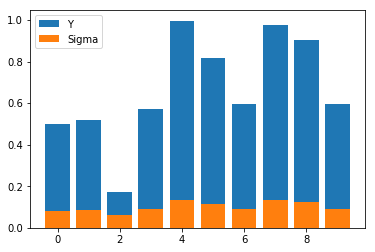

20.00107702976334

In [67]:
import matplotlib.pyplot as plt
y=np.random.random(10)
sigma=np.exp(y)/np.sum(np.exp(y))

plt.bar(range(10),y)
plt.bar(range(10),sigma)
plt.legend(['Y','Sigma'])
plt.show()

np.sum(np.exp(y))


## Observations and Exercises

- The sigmoid function has the computationally attractive property that its derivative does not require to recompute the fraction involving the exponent, but simply $\sigma'(x)=\sigma(x)(1-\sigma(x))$. <i>Can you find where the derivative of the sigmoid function is being used in the code?</i>

- Increasing the learning rate leads to better fits with lesser epochs. <i>Experiment with the learning rate. What do you observe when the learning rate gets too high? What happens if it gets too slow? Revisit the simple Perceptron, what is the difference here?</i>

- An iteration of the algorithm above presents the entire training set to the learning algorithm. This is also known as an <i>epoch</i>. <i>Compute the total number of forward and back propagations as a function of the number of epochs and the size of the training set.</i>

- Adding more data can sometimes help to decrease the number of epochs, but whether this works depends on the kind of data provided as well as the architecture of the neural network. <i>Experiment with increasing the size of the training set. Are you able to improve prediction accuracy with lesser number of epochs for the XOR function?</i>

# Literature

Blum, A., & Rivest, R. L. (1989). Training a 3-node neural network is NP-complete. In Advances in neural information processing systems (pp. 494-501).

Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1985). Learning internal representations by error propagation (No. ICS-8506). California Univ San Diego La Jolla Inst for Cognitive Science.
